# Ford GoBike (Lyft) System Data

## by DAOU Otmane

<font size="4">This project is about Bay Wheels (called also Ford GoBike after a  partnership with Ford Motor Company) routes for public use data set. Bay Wheels is a regional public bicycle sharing system in the San Francisco Bay Area, California. It's owned by Lyft, the system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose. </font>

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('2017-fordgobike-tripdata.csv')
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


In [4]:
df.shape

(519700, 13)

In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000


<font size = "3">As I noticed they are many outliers values which need to reduce their impact in any futur plotting or analysis. For this, I will use IQR calculting method to drop all outliers values from the dataset.<font>

In [6]:
# Calculating the quartil interval
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

duration_sec                556.000000
start_station_id            115.000000
start_station_latitude        0.021900
start_station_longitude       0.020692
end_station_id              111.000000
end_station_latitude          0.020872
end_station_longitude         0.019311
bike_id                    1733.000000
dtype: float64

In [7]:
#Just keep the values that are within the range Q1 - 1.5*IQR and Q4 + 1.5*IQR. 
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(357900, 13)

<font size = "3"> As we can notice that the number of observation is reduced by 161800 observations (519700-357900), all this observations are outlier values. <font>

### Some quality wrangling work 

<font size="3">I noticed that it is necessary to convert the duration_sec column to a more readable time form, for this purpose I executed a conversion function for each value in this column and creating new column with the new time format</font>

In [8]:
#Creating a function which convert duration_sec values to time format
def convert(seconds): 
    min, sec = divmod(seconds, 60) #Convert seconds to minutes 
    hour, min = divmod(min, 60) #Convert minutes to hours
    return "%d:%02d" % (hour, min) #Return the getting hour and minute in giving format

df['hire_time'] = df.duration_sec.apply(lambda x : convert(x)) #Apply the convert function for duration_sec 
                                                                #and creating a new column called hire_time 

df.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,hire_time
15,1544,2017-12-31 23:53:38.9430,2018-01-01 00:19:23.0470,14,Clay St at Battery St,37.795001,-122.39997,27,Beale St at Harrison St,37.788059,-122.391865,558,Subscriber,0:25
16,1474,2017-12-31 23:54:40.1460,2018-01-01 00:19:14.3510,14,Clay St at Battery St,37.795001,-122.39997,27,Beale St at Harrison St,37.788059,-122.391865,3646,Subscriber,0:24


<font size="3">I noticed that it is necessary also to calculate distance from start station to end station based latitude and longitude values, for this purpose I performed a mathematical function</font>

In [9]:
from math import sin, cos, sqrt, atan2, radians

#Creating distances function 
def distances(x1, y1, x2, y2):
    # approximate radius of earth in km
    R = 6373.0
    
    #Calculing the radians of start point and end point of longitude, and the same of latitude
    lat1 = radians(x1)
    lon1 = radians(y1)
    lat2 = radians(x2)
    lon2 = radians(y2)
    
    #Calculing the difference between the start point and end point
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = '{:0.1f}'.format(R * c)
    
    return distance
#
df['distance'] = df.apply(lambda row : distances(row['start_station_latitude'], row['start_station_longitude'], 
                                                 row['end_station_latitude'], row['end_station_longitude']), axis = 1) 

df.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,hire_time,distance
15,1544,2017-12-31 23:53:38.9430,2018-01-01 00:19:23.0470,14,Clay St at Battery St,37.795001,-122.39997,27,Beale St at Harrison St,37.788059,-122.391865,558,Subscriber,0:25,1.1
16,1474,2017-12-31 23:54:40.1460,2018-01-01 00:19:14.3510,14,Clay St at Battery St,37.795001,-122.39997,27,Beale St at Harrison St,37.788059,-122.391865,3646,Subscriber,0:24,1.1


<font size = "3">Convert the distance and hire time values to convenient format</font>

In [10]:
# convert distance to float
df.distance = df.distance.astype('float')

In [11]:
#Convert hire_time to timedelta
from datetime import datetime, timedelta

def convert(x):
    # Specify the input and the format
    t = datetime.strptime(str(x),"%H:%M")
    # And use datetime's hour, min and sec properties to build a timedelta
    delta = timedelta(hours=t.hour, minutes=t.minute)
    return delta

df['hire_time'] = df.hire_time.apply(lambda x: convert(x)) #Apply the convert function to hire_time column

In [12]:
df.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,hire_time,distance
15,1544,2017-12-31 23:53:38.9430,2018-01-01 00:19:23.0470,14,Clay St at Battery St,37.795001,-122.39997,27,Beale St at Harrison St,37.788059,-122.391865,558,Subscriber,00:25:00,1.1
16,1474,2017-12-31 23:54:40.1460,2018-01-01 00:19:14.3510,14,Clay St at Battery St,37.795001,-122.39997,27,Beale St at Harrison St,37.788059,-122.391865,3646,Subscriber,00:24:00,1.1


<font size = "3">I noticed that is useful to extract year, month, day from the start_time column.</font>

In [13]:
#convert start_time to datetime
df['start_time'] = pd.to_datetime(df['start_time'])

#extract year, month and day from start_time column to new columns
df['start_year'] = df['start_time'].dt.year
df['start_month'] = df['start_time'].dt.month
df['start_day'] = df['start_time'].dt.day

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357900 entries, 15 to 519699
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype          
---  ------                   --------------   -----          
 0   duration_sec             357900 non-null  int64          
 1   start_time               357900 non-null  datetime64[ns] 
 2   end_time                 357900 non-null  object         
 3   start_station_id         357900 non-null  int64          
 4   start_station_name       357900 non-null  object         
 5   start_station_latitude   357900 non-null  float64        
 6   start_station_longitude  357900 non-null  float64        
 7   end_station_id           357900 non-null  int64          
 8   end_station_name         357900 non-null  object         
 9   end_station_latitude     357900 non-null  float64        
 10  end_station_longitude    357900 non-null  float64        
 11  bike_id                  357900 non-null  int64          
 12  u

### The structure of dataset
 <br>
<font size="4">
This dataset contains 519700 observations and 13 features. <br>
4 columns are integer(duration_sec, start_station_id, end_station_id, bike_id). <br>
5 columns are object where start_time and end_time are timestamp, while that start_station_name, end_station_name, user_type are string. <br>
4 columns are float (start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude). <br>
I convert duration_sec to time readable format and I calculate the distance tracks from latitude and londitude columns. Also I extract the year, month and day from start_time column. Which mean I added 5 other columns to my dataset.
</font> 

### The main feature of interest in dataset

<font size="4">I am interested in this new concept of renting bikes, I want analysis the time and distance traveled by each consumer and know which type of consumers is more  useable of Lyft services.</font>

### The features in the dataset help support myinvestigation into my feature(s) of interest

<font size="4"> There are two types of bike users (Customer, Subscriber) I want to know which one uses the bikes more and for how long, thus the top 10 most popular start and finish stations in the city.</font>


## Univariate Exploration


To keep the orginal structure of our dataset and don't lost the data in case I make a copy of the dataset.

In [15]:
df_copy = df.copy()
df_copy.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,hire_time,distance,start_year,start_month,start_day
15,1544,2017-12-31 23:53:38.943,2018-01-01 00:19:23.0470,14,Clay St at Battery St,37.795001,-122.399970,27,Beale St at Harrison St,37.788059,-122.391865,558,Subscriber,00:25:00,1.1,2017,12,31
16,1474,2017-12-31 23:54:40.146,2018-01-01 00:19:14.3510,14,Clay St at Battery St,37.795001,-122.399970,27,Beale St at Harrison St,37.788059,-122.391865,3646,Subscriber,00:24:00,1.1,2017,12,31
17,1397,2017-12-31 23:55:09.686,2018-01-01 00:18:26.7210,78,Folsom St at 9th St,37.773717,-122.411647,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,1667,Customer,00:23:00,2.9,2017,12,31


### The percentage of each user type

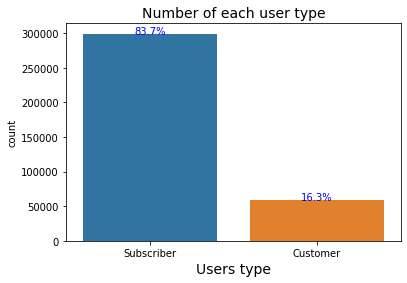

In [16]:
sb.countplot(data = df_copy, x = df_copy.user_type)
n_points = df_copy.shape[0]
user_counts = df_copy['user_type'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = user_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count, pct_string, ha = 'center', color = 'b')
plt.title('Number of each user type', fontsize = 14)
plt.xlabel('Users type', fontsize = 14);

<font size = "4">We can notice that the majority of Lyft vélo service users are subscribers (83.7%) and consumers (16.3%). This means that most users of Lyft services are subscribers.</font>

<font size = "4">The Distribution of duration_sec</font>

In [17]:
#Calculing the duration_sec average
duration_mean = df_copy.duration_sec.mean()
duration_mean

648.1845906677843

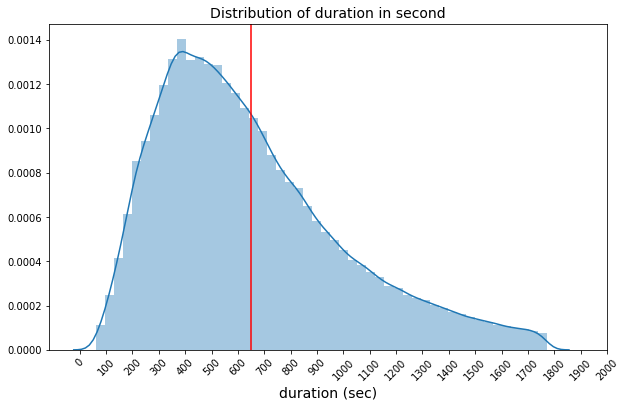

In [18]:
plt.figure(figsize = [10, 6])
sb.distplot(df_copy['duration_sec'], rug=False, hist=True) #Plotting the duration_sec distribution 

plt.axvline(x=duration_mean,color ='red') #Creating a red axis to showing the mean position in the graphe
plt.xticks(np.arange(0, 2000+100, 100), rotation = 45) #Set up the X axis values 
plt.title('Distribution of duration in second', fontsize = 14)
plt.xlabel('duration (sec)', fontsize = 14);

<font size = "4">We can notice that the distribution of duration_sec is left skew, this mean that the majority of users use the Lyft services under the mean duration which is 648.18 seconds.</font>


<font size = "4">The Distribution of hire_time</font>

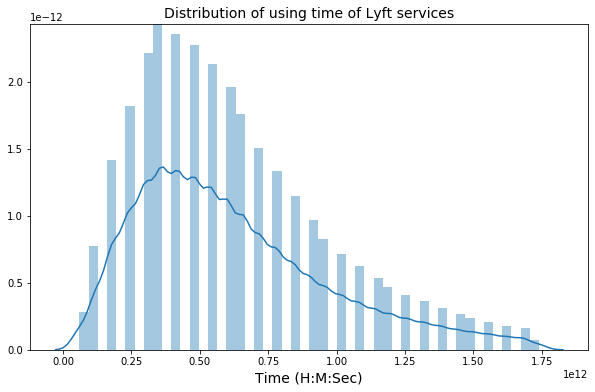

In [19]:
plt.figure(figsize = [10, 6])
sb.distplot(df_copy.hire_time, hist=True) #Plotting the hire_time distribution 
plt.title('Distribution of using time of Lyft services', fontsize = 14)
plt.xlabel('Time (H:M:Sec)', fontsize = 14);

<font size = "4">As we can see the distribution of users use the LYFT service time is right skewed distribution, which mean that the majority use the bikes for sshort duration under 1 hour. Which confirm the same result as before</font>


<font size = "4">The Distribution of distance traveled</font>

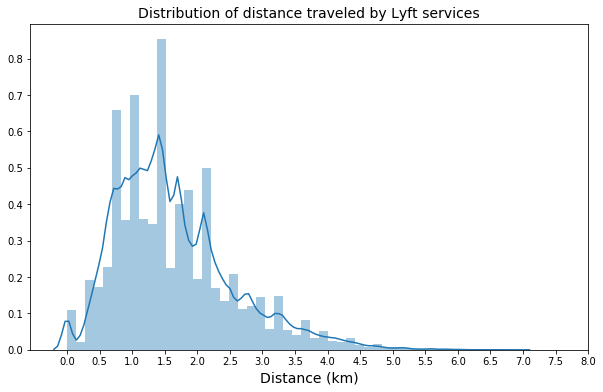

In [20]:
plt.figure(figsize = [10, 6])
sb.distplot(df_copy['distance'], rug=False) #Plotting the distance distribution 
plt.xticks(np.arange(0, 8+0.5, 0.5)) #Set up the X axis values 
plt.title('Distribution of distance traveled by Lyft services', fontsize = 14)
plt.xlabel('Distance (km)', fontsize = 14);

<font size = "4">According to this histogram we can see that the users of LYFT Services use the bikes for short distances that do not exceed 5 km in the majority of cases.</font>

<font size = "4">The Distribution of distance cumulation</font>

In [21]:
#Creating a dictionary of claculing distance between start_station_id and end_station_id
s = df_copy.groupby(['start_station_id', 'end_station_id']).distance.sum().round(2).sort_values(ascending = False).to_dict()

#Creating a new dictionary with 2 lists
#List of first dictionary values and List of first dictionary keys
data = {'trajectory': list(s.keys()), 'distance':list(s.values())}

#Creating new Trajectory data frame 
trajectory = pd.DataFrame(data)


In [22]:
Q1 = trajectory.quantile(0.25)
Q3 = trajectory.quantile(0.75)
IQR = Q3 - Q1
IQR

distance    34.7
dtype: float64

In [23]:
trajectory.shape

(12024, 2)

In [24]:
#Remove the outliers
trajectory = trajectory[~((trajectory < (Q1 - 1.5 * IQR)) |(trajectory > (Q3 + 1.5 * IQR))).any(axis=1)]
trajectory.shape

(10744, 2)

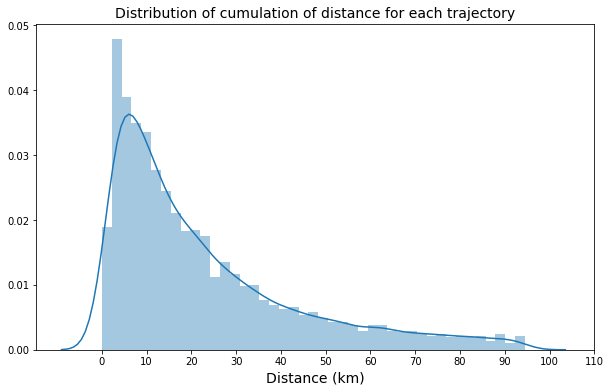

In [25]:
plt.figure(figsize = [10, 6])
sb.distplot(trajectory['distance'], rug=False, hist=True)
plt.xticks(np.arange(0, 110+10, 10))
plt.title('Distribution of cumulation of distance for each trajectory', fontsize = 14)
plt.xlabel('Distance (km)', fontsize = 14);

<font size = "4">After summing up the distances from the same starting point and different arrival points, I found that the majority of the distances covered are less than 20 km. This gives another indication of the short distances travelled by users. </font>

### The counting of months in dataset

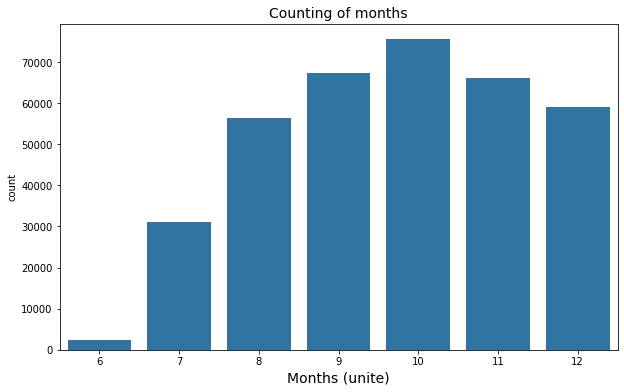

In [26]:
plt.figure(figsize = [10, 6])
base_color = sb.color_palette()[0]
sb.countplot(data = df_copy, x = df_copy.start_month, color = base_color)
plt.title('Counting of months', fontsize = 14)
plt.xlabel('Months (unite)', fontsize = 14);

<font size = "4">Even the data collection starts in June, we can notice the optimum is reached in October and starts to decrease in November and December. it is probably caused by the beginning of the winter season.</font>

<font size = "4">The distrubtion of the variables is right skewed distributed and give an idea how the users use the Lyft services for short duration and distance in majority of cases. Also, before I start plotting, I droped the outlier values to eliminate the outlier effect.</font>
<br>
<font size = "4">In my case I convert some columns to readable and useful format of data, like date, time and distance. For distance altitude and longitude columns become useless after calculating distance.</font>

## Bivariate Exploration

### The duration sum for each user type

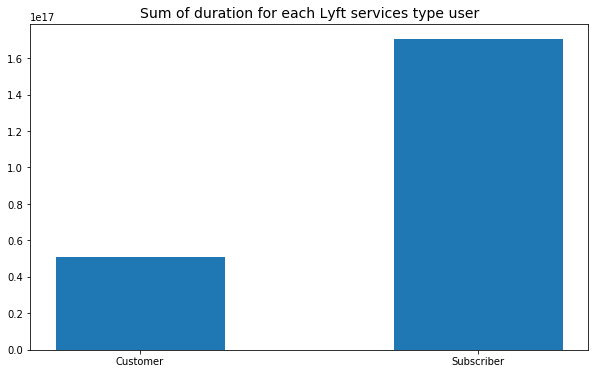

In [27]:
plt.figure(figsize = [10, 6])
users = ['Customer', 'Subscriber']
duration_sum = df_copy.groupby(['user_type']).hire_time.sum()
plt.bar(users,duration_sum, width = 0.5)
plt.title('Sum of duration for each Lyft services type user', fontsize = 14);

<font size = "4">As we can see they are a huge gape between using time of Subscribers and Customers, it's can be 3 times the using duration sum of Customers. </font>

### The distance sum for each user type

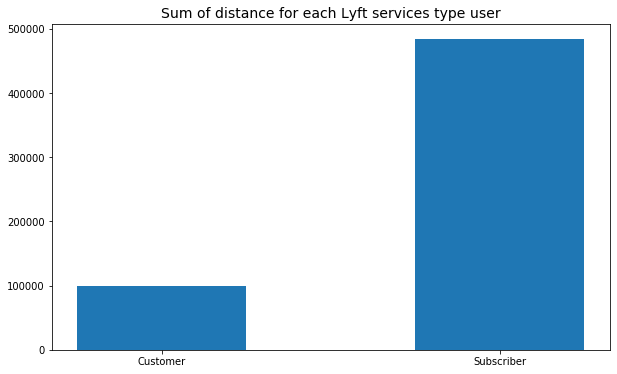

In [28]:
plt.figure(figsize = [10, 6])
users = ['Customer', 'Subscriber']
duration_sum = df_copy.groupby(['user_type']).distance.sum()
plt.bar(users,duration_sum, width = 0.5)
plt.title('Sum of distance for each Lyft services type user', fontsize = 14);

<font size = "4">As we noticed for using time sum in chart above, is the same case for using distance sum, they are a huge gape between using distance of Subscribers and Customers, it's can be 4 times the using duration sum of Customers. </font>

<font size = "4">Statistical reporting for each consumers by distance</font>

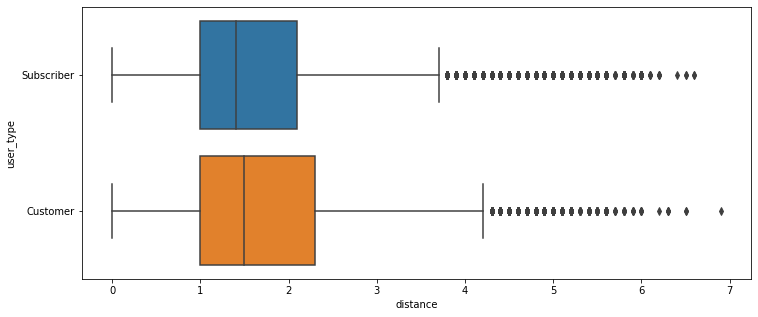

In [29]:
plt.figure(figsize = [12, 5])
sb.boxplot(data = df_copy, y = 'user_type', x = 'distance');

<font size = "4">As we can see the Customers have a large variation of distance values than the Subscribers, in other hand the Subscribers have more outlier values than Customers.</font>

Statistical reporting for each consumers by duration_sec

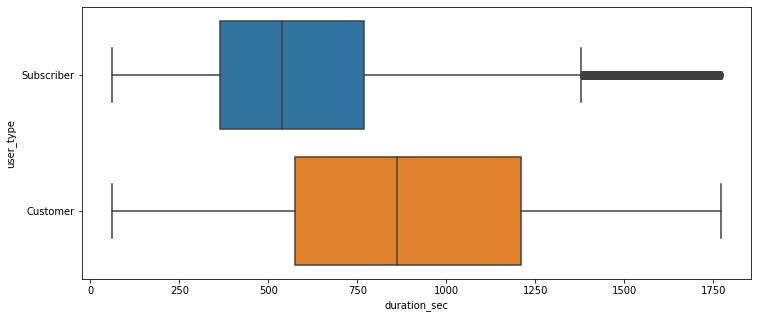

In [30]:
plt.figure(figsize = [12, 5])
sb.boxplot(data = df_copy, y = 'user_type', x = 'duration_sec');

<font size = "4">As we can see the Customers have a large variation of duration_sec values than the Subscribers, in other hand the Subscribers have more outlier values than Customers.</font>

<font size= '4'>To simplify the comparison and the analysis of the results, I planned to create bins for distance, hire time and duration_sec. These bins are based on quartiles to get equal bins.</font>

In [31]:
# For duration_sec: Q1 = 382 sec, Q2 = 576 sec, Q3 = 842 sec, MAX = 1172 sec
df_copy['duration_bins'] = pd.qcut(df_copy.duration_sec, 4, labels = ['<= 382 sec', '<= 576 sec', '<= 842 sec', '<= 1172 sec'])

# for distance: Q1 = 1 km, Q2 = 1.5 km, Q3 = 2.1 km, Max = 6.9 km
df_copy['distance_bins'] = pd.qcut(df_copy.distance, 4, labels = ['<= 1 km', '<= 1.5 km', '<= 2.1 km', '<= 6.9 km'])

# For hire_time: Q1 = 06 min, Q2 = 09 min, Q3 = 14 min, Max = 29 min
df_copy['hire_bins'] = pd.qcut(df_copy.hire_time, 4, labels = ['<= 06 min', '<= 09 min', '<= 14 min', '<= 29 min'])

### The distance traveled for each time quartile bin

<Figure size 1152x720 with 0 Axes>

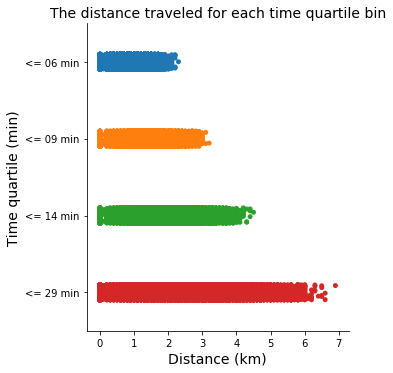

In [32]:
plt.figure(figsize = [16, 10])
sb.catplot(x="distance", y="hire_bins", data=df_copy)
plt.title('The distance traveled for each time quartile bin', fontsize = 14)
plt.xlabel('Distance (km)', fontsize = 14)
plt.ylabel('Time quartile (min)', fontsize = 14);

<font size = "4">As we can see the number of users who use the Lyft bikes for long time traveling more distance, but they are many users who use Lyft bikes for long period but didn't use it for long distance.</font>

### The duration passed for each distance quartile bin

<Figure size 1152x720 with 0 Axes>

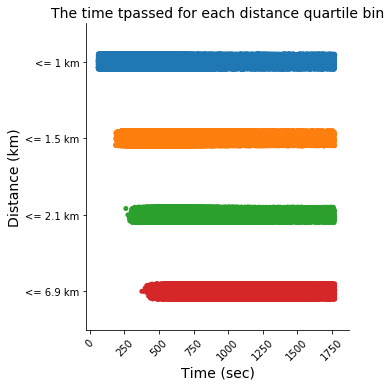

In [33]:
plt.figure(figsize = [16, 10])
sb.catplot(y="distance_bins", x="duration_sec", data=df_copy)
plt.xticks(rotation = 45)
plt.title('The time tpassed for each distance quartile bin', fontsize = 14)
plt.xlabel('Time (sec)', fontsize = 14)
plt.ylabel('Distance (km)', fontsize = 14);

<font size = "4">As we can see they are many number of users who use the Lyft bikes for short distance traveling but use the bikes for long time. Also they are many users who use Lyft bikes for long distance but didn't use it for long time.</font>

<font size = "4">Distribution of using Lyft services by time and distance in months and week days </font>

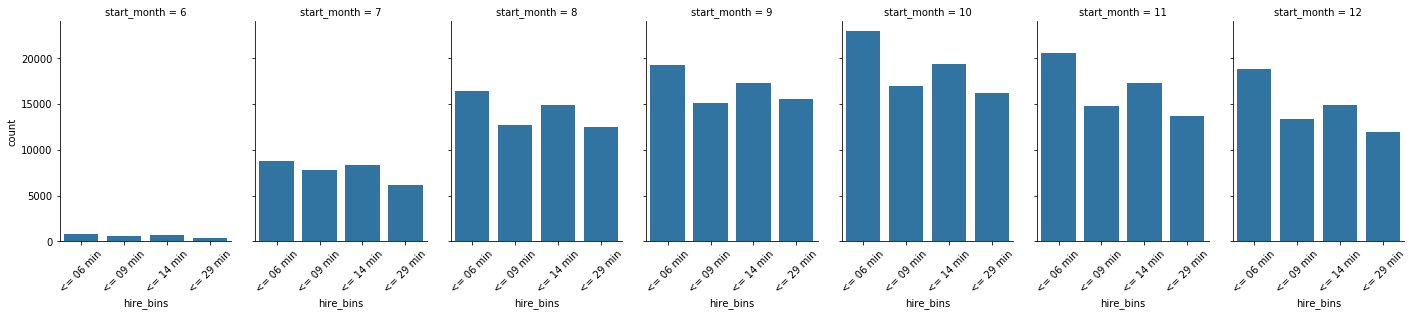

In [34]:
chart = sb.catplot(x="hire_bins", col="start_month", data=df_copy, kind="count", height=4, aspect=0.7, color = base_color)
chart.set_xticklabels(rotation=45)

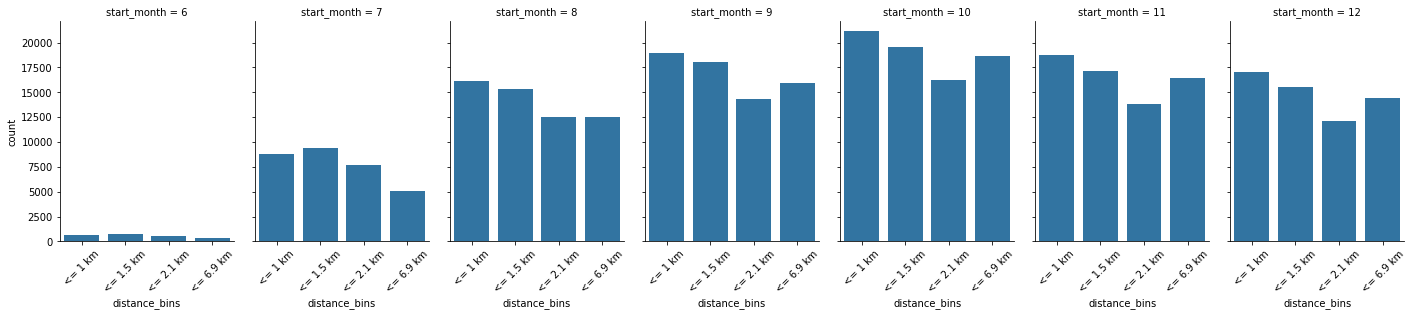

In [35]:
chart2 = sb.catplot(x="distance_bins", col="start_month", data=df_copy, kind="count", height=4, aspect=0.7, color = base_color)
chart2.set_xticklabels(rotation=45);

<font size = "4">There is no change in the behavior of Lyft bike service users in terms of time and distance of use throughout the months. There is a general tendency to use the service for short and medium duration and the same for distance. Note also that the use intensified in the month of October after an increase during the previous 4 months. </font>

<font size = "4">Firstly, I wanted to know the use of Lyft bike service for each type of consumer, I found that Suscribers use these services more for long duration and long distance. 
Secondly, I found that the time of use and distances travelled are very varied for Customer consumers more than Subscriber consumers. Thirdly, I noticed that many of both types of users use Lyft's services to rent bikes for a long period of time but do not use them for long distance, alsp I noticed that many users ride long distances but for a short period of time, so it is important to know which type of users do so. Concerning the distribution of use of Lyfts vélo services all along the months concerned in this dataset, the same logic of use in terms of time and distance remains valid.</font>
<br>

## Multivariate Exploration

### The average of distance traveled in each time quartile bin for type users

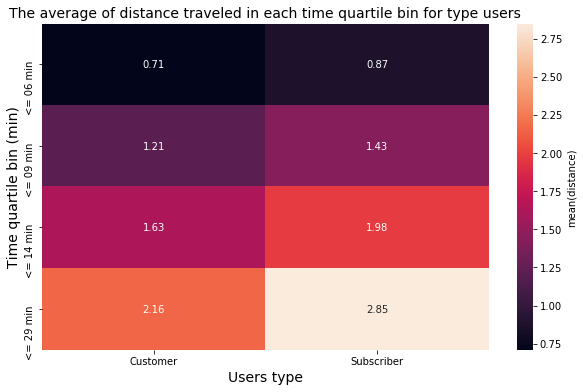

In [36]:
plt.figure(figsize = [10, 6])

#Grouping df_copy by user_type and hire_bins
#Calculing the distance average after grouping
cat_means = df_copy.groupby(['user_type', 'hire_bins']).mean()['distance']
cat_means = cat_means.reset_index(name = 'distance_avg')

#Pivot the cat_means grouped data frame for using it in heatmap 
cat_means = cat_means.pivot(index = 'hire_bins', columns = 'user_type', values = 'distance_avg')

#Plotting heatmap
sb.heatmap(cat_means, annot = True, fmt = '.2f', cbar_kws = {'label' : 'mean(distance)'})

#Set up Title, X-axis and Y-axis labels
plt.title('The average of distance traveled in each time quartile bin for type users', fontsize = 14)
plt.xlabel('Users type', fontsize = 14)
plt.ylabel('Time quartile bin (min)', fontsize = 14);

<font size = "4">Subscribe consumers use the Lyft vélo services for a longer average distance and for a longer period of time than Customer consumers, which is in line with the results of the bivariate analysis.</font>

### The average of duration passed in each distance quartile bin for type users

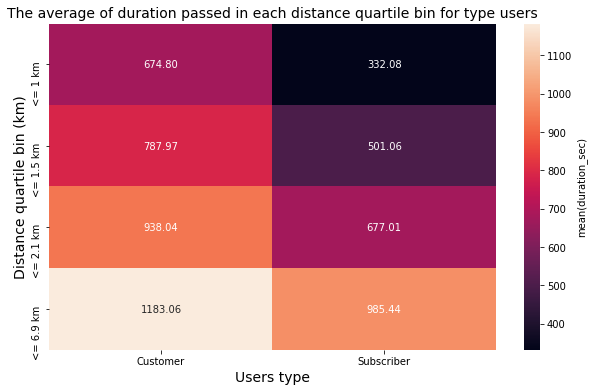

In [37]:
plt.figure(figsize = [10, 6])

#Grouping df_copy by user_type and distance_bins
#Calculing the duration_sec average after grouping
cat_means2 = df_copy.groupby(['user_type', 'distance_bins']).mean()['duration_sec']
cat_means2 = cat_means2.reset_index(name = 'duration_avg')

#Pivot the cat_means2 grouped data frame for using it in heatmap 
cat_means2 = cat_means2.pivot(index = 'distance_bins', columns = 'user_type', values = 'duration_avg')

#Plotting heatmap
sb.heatmap(cat_means2, annot = True, fmt = '.2f', cbar_kws = {'label' : 'mean(duration_sec)'})

#Set up Title, X-axis and Y-axis labels
plt.title('The average of duration passed in each distance quartile bin for type users', fontsize = 14)
plt.xlabel('Users type', fontsize = 14)
plt.ylabel('Distance quartile bin (km)', fontsize = 14);

<font size = "4">We can notice that the Customer Consumers use the Lyft vélo services for a higher average duration and for a longer period of time than the Subscriber Consumers.</font>

### Comparison between the average of duration of each user type by distance

/home/otmane/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x432 with 0 Axes>

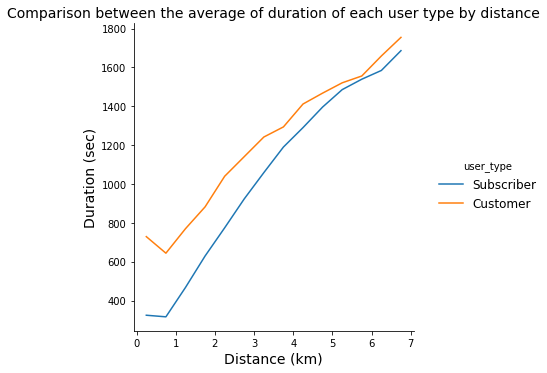

In [38]:
plt.figure(figsize = [10, 6])

def mean_poly(x, y, bins = 10, **kwargs):
    """ Custom adapted line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    means = y.groupby(data_bins).mean()

    # create plot
    plt.errorbar(x = bin_centers, y = means, **kwargs)

#Set up bins value
bin_edges = np.arange(0, df['distance'].max()+0.5, 0.5)

#Set up a line for each user
g = sb.FacetGrid(data = df_copy, hue = 'user_type', size = 5)

#Plotting the lines 
g.map(mean_poly, "distance", "duration_sec", bins = bin_edges)
g.add_legend(fontsize = 12)

#Set up Title, X-axis and Y-axis labels
plt.title('Comparison between the average of duration of each user type by distance', fontsize = 14)
plt.xlabel('Distance (km)', fontsize = 14)
plt.ylabel('Duration (sec)', fontsize = 14);

<font size = "4">As we have seen above, we notice in the line chart that Costumer consumers use the Lyft vélo service for a higher average duration than Subscriber consumers.</font>

<font size = "4">In multi-variable visualization I found that Customers use Lyft bikes for a higher average time than Subscribers for long distances, which even shows that the number of Subscriber Consumers is higher than the number of Customer Consumers, but the latter use the bicycles for a higher average duration.</font>
<br>
<font size = "4">The relationship noted above appeared difficult to in Univariate and Bivariate visualization, given that it is normal is a duration of use of Lyft bicycles services must be higher among Subscribers than Customers.</font>